In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path="/content/drive/My Drive/flower_data"

In [0]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 20:
        lrate = 0.0005
    if epoch > 40:
        lrate = 0.0003
    return lrate

In [4]:
import os
import cv2
import numpy as np
import glob
import keras
#from sklearn.utils import shuffle
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from keras import optimizers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
img_dir=(path+"/images")
label_dir=(path+"/labels")

img=sorted(glob.glob(img_dir+"/*.jpg"))
label= sorted(glob.glob(label_dir+"/*.jpg"))

In [6]:
print(img[0])
print(label[0])

/content/drive/My Drive/flower_data/images/0.jpg
/content/drive/My Drive/flower_data/labels/0.jpg


In [7]:
print(len(img))
print(len(label))

3670
3670


In [8]:
images=[]
labels=[]
for i in range(300):
    i=cv2.imread(img[i])
    images.append(i)

for i in range(300):
    l=cv2.imread(label[i])
    labels.append(l)
    
    
images=np.array(images)
labels=np.array(labels)
print(images.shape)
print(labels.shape)

(300, 224, 224, 3)
(300, 224, 224, 3)


In [0]:
images = images.astype('float32') / 255.
labels = labels.astype('float32') / 255.

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, random_state=10)
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size=0.5, random_state=10)

In [11]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(224, 224, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='categorical_crossentropy',metrics=['accuracy'])

W0804 12:42:27.622717 139673055680384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 12:42:27.663057 139673055680384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 12:42:27.670429 139673055680384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 12:42:27.701431 139673055680384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0804 12:42:27.746379 139673055680384 deprecation_wrapp

In [63]:
import keras
import os
import cv2
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input,BatchNormalization,Activation,AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.layers import Reshape
from keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
weight_decay = 1e-4
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same',  activation='relu'))
model.add(Conv2D(3, (1,1), padding='same',activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_241 (Conv2D)          (None, 224, 224, 32)      896       
_________________________________________________________________
activation_105 (Activation)  (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_242 (Conv2D)          (None, 224, 224, 32)      9248      
_________________________________________________________________
conv2d_243 (Conv2D)          (None, 224, 224, 3)       99        
Total params: 10,243
Trainable params: 10,243
Non-trainable params: 0
_________________________________________________________________


In [64]:
rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

model.compile(loss='binary_crossentropy',optimizer=rms,metrics=['accuracy'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.0001,mode='min')

callbacks_list = [reduce_lr,LearningRateScheduler(lr_schedule)]

batch_size=32

epochs=50
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,callbacks=callbacks_list,validation_data=(x_val,y_val))

Train on 210 samples, validate on 45 samples
Epoch 1/50
210/210 [==============================] - 12s 58ms/step - loss: 0.6811 - acc: 0.0144 - val_loss: 0.6607 - val_acc: 0.0174
Epoch 2/50
210/210 [==============================] - 1s 3ms/step - loss: 0.6556 - acc: 0.0146 - val_loss: 0.6359 - val_acc: 0.0174
Epoch 3/50
210/210 [==============================] - 1s 3ms/step - loss: 0.6283 - acc: 0.0147 - val_loss: 0.6143 - val_acc: 0.0173
Epoch 4/50
210/210 [==============================] - 1s 3ms/step - loss: 0.6046 - acc: 0.0147 - val_loss: 0.5841 - val_acc: 0.0174
Epoch 5/50
210/210 [==============================] - 1s 3ms/step - loss: 0.5832 - acc: 0.0147 - val_loss: 0.5628 - val_acc: 0.0174
Epoch 6/50
210/210 [==============================] - 1s 3ms/step - loss: 0.5693 - acc: 0.0146 - val_loss: 0.5582 - val_acc: 0.0174
Epoch 7/50
210/210 [==============================] - 1s 3ms/step - loss: 0.5551 - acc: 0.0147 - val_loss: 0.5504 - val_acc: 0.0174
Epoch 8/50
210/210 [=========

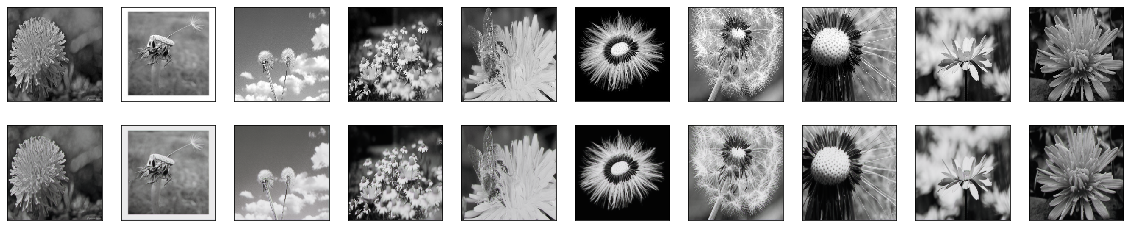

In [65]:
decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(y_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()